### Reading and showing images

In [ ]:
#read
img = io.imread('img.jpeg')
io.imshow(img)
io.show()

In [ ]:
import cv2

### Histograms

In [ ]:
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

for bin in [256, 64, 8]:
    histogramImg = histogram(image/255, nbins=bin)
    showHist(image, histogramImg)

### Color conversions and channel splitting

In [ ]:
#rgb to gray
def gray_image(image):
    gray = rgb2gray(image)

#channel extraction
r,g,b = image[:,:,0],image[:,:,1],image[:,:,2]


#rgb to hsv
def HSV_image(image):
    hsv = rgb2hsv(image)
    h, s, v = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

### Convolutions (high-pass, low-pass filters)

In [ ]:
from scipy.signal import convolve2d

#LPF (avg)
f1 = (1/9) * np.ones([3,3])

f=np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

#HPF (edge detection)
f2 = np.ones([3,3])
f2[1, 1] = -8 

#Horizontal edge detection
f3 = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])

#Vertical edge detection                     
f4 = f3.transpose()

#Applying filter
img_f1 = convolve2d(noisy_img,f1)

In [ ]:
#Non-linear filters(median, gauss) 
from skimage.filters import median
from skimage.filters import gaussian

median_filtered_image_skimage = skimage.filters.median(noisy_img)
gaussian_filtered_image = gaussian(noisy_img, sigma=0.2)


In [ ]:
def Negative(img):
    return 255 - img

### Contrast enhancement (histogram equalization, Gamma correction)

In [ ]:
# contrast enhancement

#gamma correction (new = old^gamma) 
# if intensity values (0-1) gamma > 1 -> darker image, gamma < 1 -> brighter image

def Gamma_Correction(img, gamma):
    x, y = img.shape
    enhanced_img = np.ones((x,y))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            enhanced_img[i][j] = (img[i][j] * 255) ** gamma       
    return enhanced_img

#histogram equalization
def getImageWithHist(img, nbins=256):
    # showHist(img)

    hist, _= np.histogram(img.flatten(), bins=nbins, range=(0,256))
    cdf = hist.cumsum()

    x,y = img.shape
    cdf_normalized = cdf / (x * y)


    T = (255 * cdf_normalized).astype('uint8')

    equalized_img = T[img]

    return equalized_img

### Edge detection (Sobel, Laplacian, Canny)

In [ ]:
#edge detection (libraries)
from skimage.filters import roberts, sobel, prewitt, gaussian
img = io.imread('circuit.tif')
sobel_image = sobel(img)
sobel_image_h = sobel_h(img)
sobel_image_v = sobel_v(img)
roberts_image = roberts(img)
prewitt_image = prewitt(img)
canny_image = canny(img)

#######################################

#sobel (with weighting)
#Vertical edges
hx=np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

#Horizontal edges
hy=np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

sobel_h = pow(convolve2d(img,hx), 2)
sobel_v = pow(convolve2d(img,hy), 2)
sobel_image_both = np.sqrt(sobel_h + sobel_v)

#######################################

#LOG (Laplacian of Gaussian)
gaussian_filtered_image = gaussian(img, sigma=0.2)
f1 = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

f2 = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

f1_image = convolve2d(gaussian_filtered_image, f1) * 255
f2_image = convolve2d(gaussian_filtered_image, f2) * 255

# f1_image[f1_image < thres] = 0
f1_image = np.where(f1_image > 10, f1_image, 0)
f2_image = np.where(f2_image > 10, f2_image, 0)


### Morphological operations (erosion, dilation, opening, closing, skeletonization)
#### thresholding (Otsu)

In [ ]:
#morphology (libraries)
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.filters import threshold_otsu

#image binarize
gray = rgb2gray(img) 
threshold = threshold_otsu(gray)
bw = (gray > threshold) 

#morph operation
eroded = binary_erosion(bw)
dilated = binary_dilation(bw)
closing = binary_closing(bw, np.ones((3,12)))
skeleton = skeletonize(bw)
thinned = thin(bw, value)


### Textures

In [ ]:
#texture (GLCM)
from skimage.feature import graycomatrix, graycoprops

def get_glcm_features(gray_scale_img):
    """
    Given a grayscale image with graylevels from 0 - 255, this function returns the contrast
    and the homogeneity features of the image with the help of GLCM
    """

    glcm = graycomatrix(gray_scale_img, [1], [0], levels=256, normed=True)
    contrast = graycoprops(glcm, prop='contrast')[0][0]
    homogeneity = graycoprops(glcm, prop='homogeneity')[0][0]
    
    
    return contrast, homogeneity

### Segmentation 

In [ ]:
#segmentation

# remove green background (convert to black)
threshold = threshold_otsu(g)
mask = g > threshold
image[mask] = 0

# color distance 
distance = np.sqrt(red_diff**2 + green_diff**2 + blue_diff**2)

#iterative threshholding
prev_threshold = 0
current_threshold = intial_threshold

while prev_threshold != current_threshold:
    prev_threshold = current_threshold
    lower = img_copy[img_copy <= current_threshold]
    higher = img_copy[img_copy > current_threshold]
    lower_mean = np.mean(lower)
    higher_mean = np.mean(higher)
    current_threshold = (lower_mean + higher_mean) // 2

#binarize
img_copy[img_copy < current_threshold] = 0
img_copy[img_copy >= current_threshold] = 255

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
img = np.zeros((40_000,))
img = img.reshape(-1)
img.shape

(40000,)

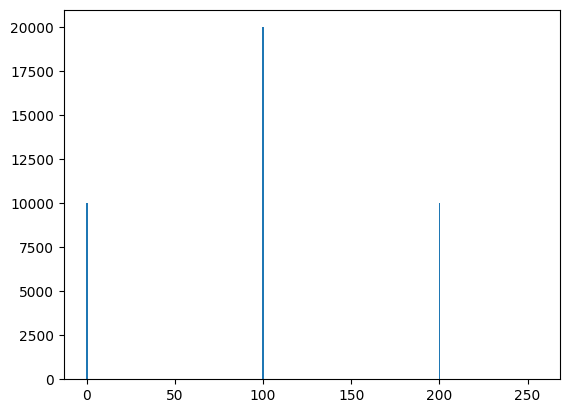

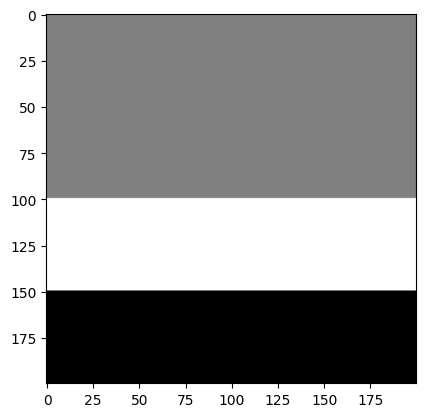

In [48]:
img[:img.shape[0]//2] = 100
img[img.shape[0]//2: 3* img.shape[0] // 4] = 200

hist = np.zeros((256,))
for i in range(0, 255):
    hist[i] = np.sum(img == i)


plt.bar(range(0, 256), hist)

plt.show()
plt.imshow(img.reshape(200,200), cmap='gray')

32640


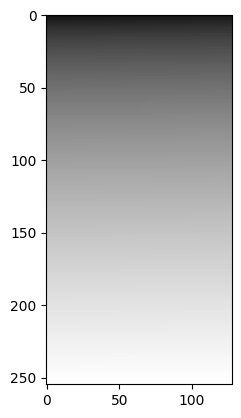

In [41]:
cum = 1
lastIndex = 0
for i in range(1, 256):
    img[lastIndex:lastIndex + cum] = i
    lastIndex += cum
    cum += 1

plt.imshow(img.reshape(255, -1), cmap='gray')
print(lastIndex)

# calculate and show histogram
hist = np.zeros((256,))
for i in range(0, 255):
    hist[i] = np.sum(img == i)


# plt.bar(range(0, 256), hist)